Saving cancer patient data sets.csv to cancer patient data sets.csv


Output()

Output()

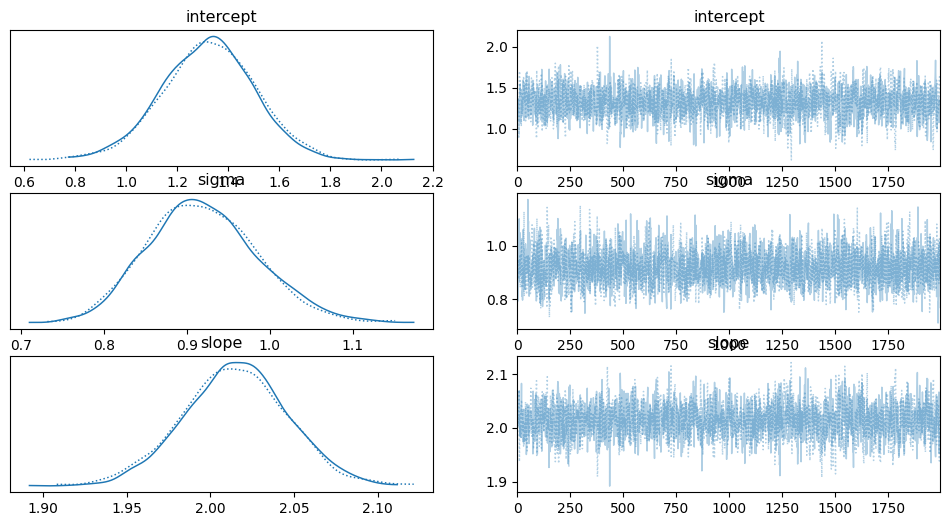

            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept  1.322  0.180   0.982    1.662      0.004    0.003    1824.0   
sigma      0.919  0.066   0.795    1.040      0.001    0.001    2350.0   
slope      2.015  0.031   1.951    2.069      0.001    0.001    1882.0   

           ess_tail  r_hat  
intercept    1821.0    1.0  
sigma        2089.0    1.0  
slope        1633.0    1.0  


In [1]:
!pip install pymc

import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('cancer patient data sets.csv')

# Selecting the target and features
X = df.drop(columns=['Level'])
y = df["Level"]

# Selecting specific features
selected_features = ['Dust Allergy', 'Obesity', 'Alcohol use', 'OccuPational Hazards', 'Genetic Risk', 'Coughing of Blood', 'Shortness of Breath', 'Fatigue', 'Chest Pain', 'Balanced Diet', 'Smoking', 'Passive Smoker', 'Wheezing', 'Air Pollution', 'Clubbing of Finger Nails', 'Snoring', 'chronic Lung Disease']
X = df[selected_features]
y = df["Level"]

# Generating synthetic data
np.random.seed(42)
true_intercept = 1.5
true_slope = 2.0
X = np.linspace(0, 10, 100)
y = true_intercept + true_slope * X + np.random.normal(0, 1, size=len(X))

# Defining the model
with pm.Model() as model:
    # Priors for unknown model parameters
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    slope = pm.Normal('slope', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome
    mu = intercept + slope * X

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=y)

    # Sampling from the posterior
    trace = pm.sample(2000)

# Plotting the trace
pm.plot_trace(trace)
plt.show()

# Printing the summary
print(pm.summary(trace))

